In [50]:
import numpy as np
import matplotlib.pyplot as plt

import os

# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

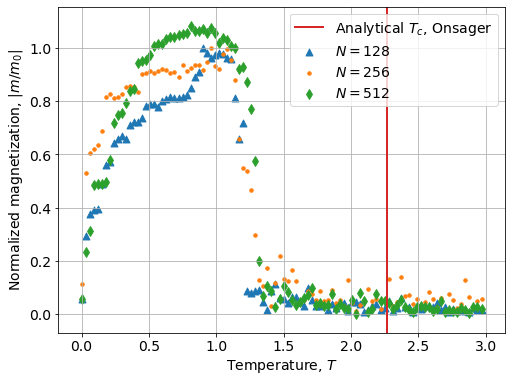

In [45]:
path = 'problem3_output/'
data_128 = np.loadtxt(path + 'N=128/magnetization.dat')
data_256 = np.loadtxt(path + 'N=256/magnetization.dat')
data_512 = np.loadtxt(path + 'N=512/magnetization.dat')

m0_128 = np.amax(np.abs(data_128[:,1]))
m0_256 = np.amax(np.abs(data_256[:,1]))
m0_512 = np.amax(np.abs(data_256[:,1]))


fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data_128[:,0], np.abs(data_128[:,1]/m0_128), s=48, marker='^', label=r'$N=128$')
ax.scatter(data_256[:,0], np.abs(data_256[:,1]/m0_256), s=48, marker='.', label=r'$N=256$')
ax.scatter(data_512[:,0], np.abs(data_512[:,1]/m0_256), s=48, marker='d', label=r'$N=512$')

ax.grid()
ax.set_xlabel(r'Temperature, $T$')
ax.set_ylabel(r'Normalized magnetization, $|m/m_0|$')
Tc = 2/np.log(1 + np.sqrt(2))
ax.axvline(Tc, color='C3', linewidth=2, label=r'Analytical $T_c$, Onsager')
ax.legend(loc='upper right')

plt.savefig(path + 'magnetization.png')

# Plot lattice at different temperatures - one above, one at and one over Tc

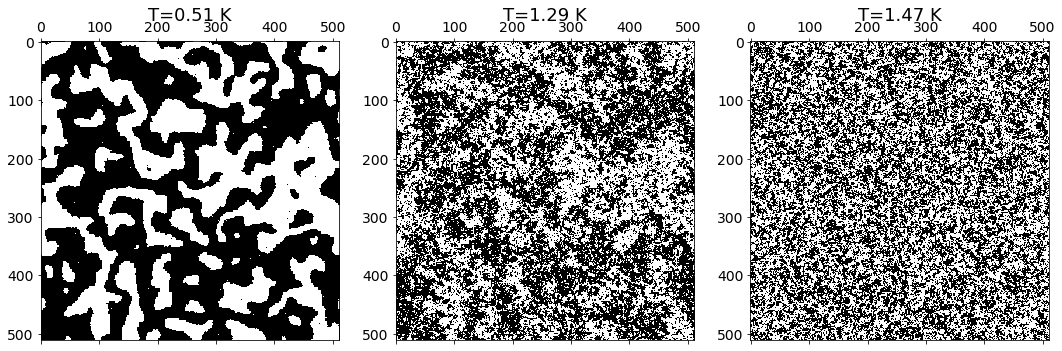

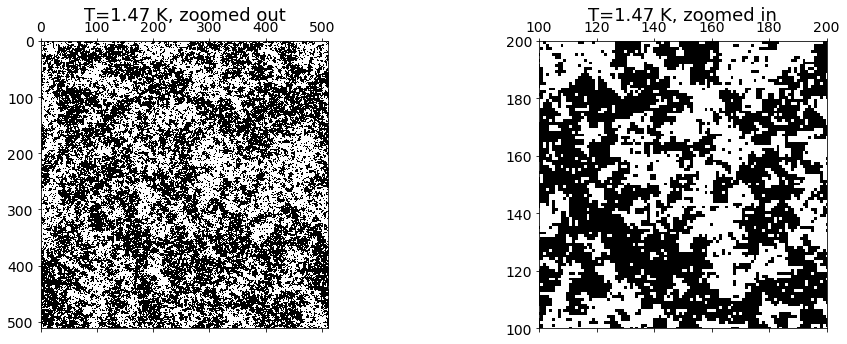

In [51]:
path = 'problem3_output/N=512/'
direct = 'lattices/'

fig, ax = plt.subplots(1,3,figsize=(15,5))

filenames = ['T=0.51', 'T=1.29', 'T=1.47']

for i, filename in enumerate(filenames):
    data_lat = np.loadtxt(path + direct + filename  + '_lattice.dat')

    ax[i].matshow(data_lat, cmap=plt.cm.gray_r)
    ax[i].set_title(filename + ' K')
plt.tight_layout()
plt.savefig(path + 'lattice_around_Tc.png')

# Plot a zoomed in version at the critical point
fig, ax = plt.subplots(1,2,figsize=(15,5))
data_lat = np.loadtxt(path + direct + 'T=1.29_lattice.dat')
ax[0].matshow(data_lat, cmap=plt.cm.gray_r)
ax[0].set_title(filename + ' K, zoomed out')

ax[1].matshow(data_lat, cmap=plt.cm.gray_r)
ax[1].set_title(filename + ' K, zoomed in')
ax[1].set_ylim(100,200)
ax[1].set_xlim(100,200)
plt.tight_layout()


# Calculate spatial correlation function for a few temperatures

# Plot lattices

/home/eric/miniconda3/envs/physics/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


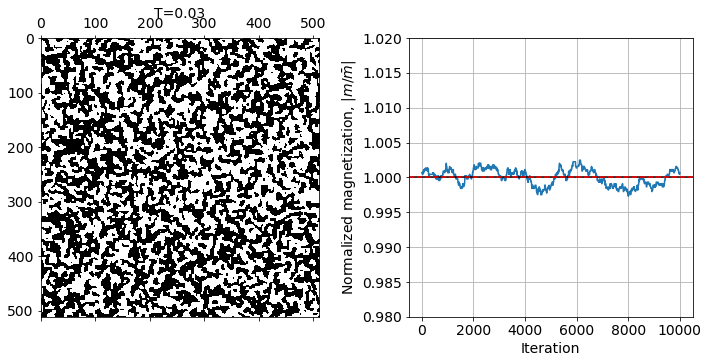

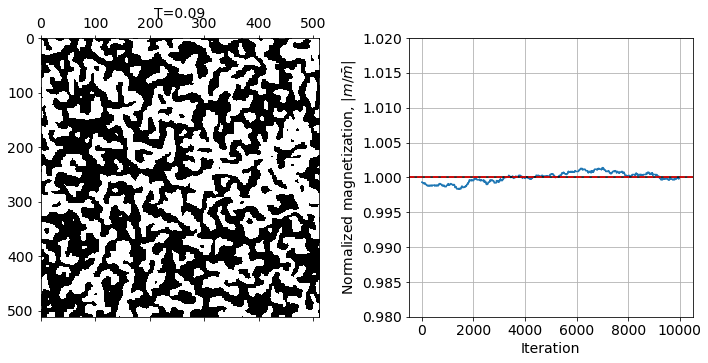

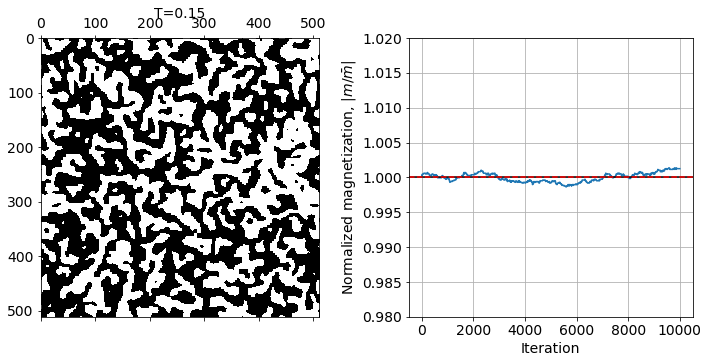

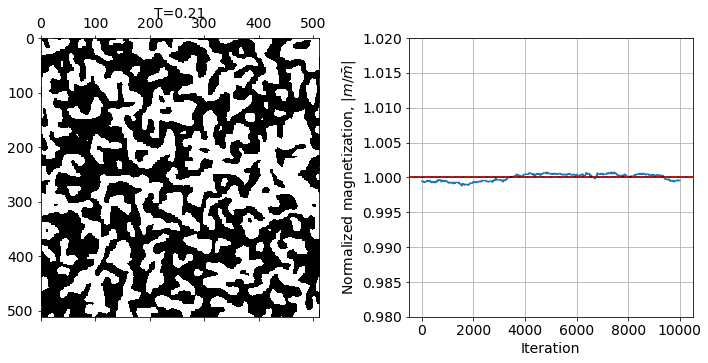

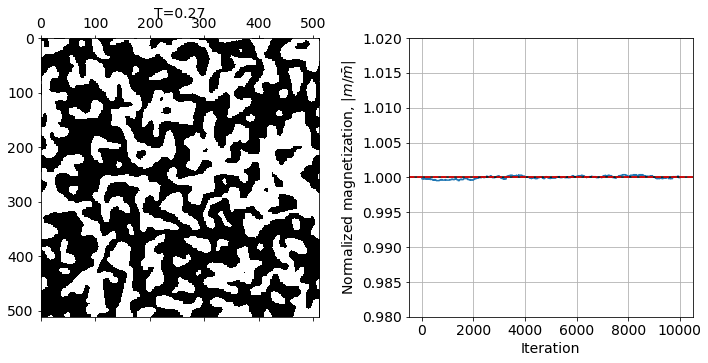

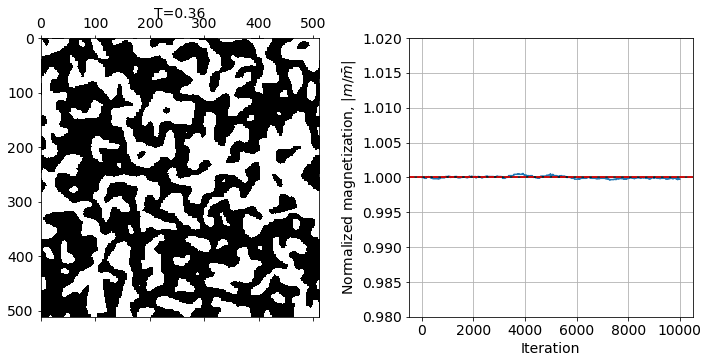

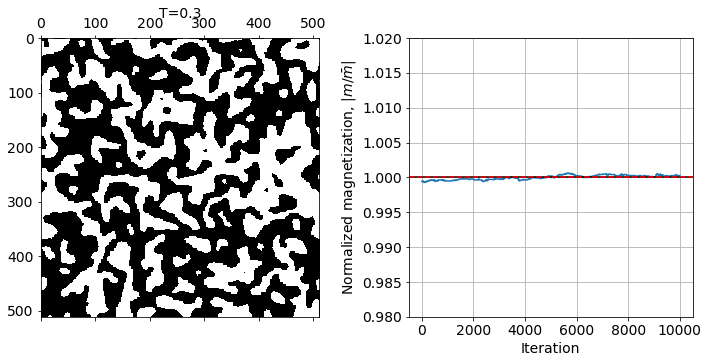

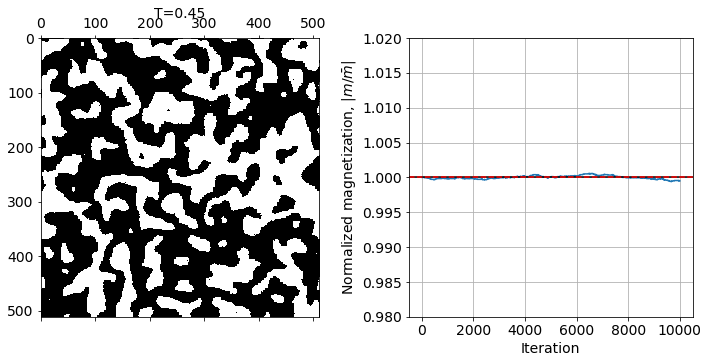

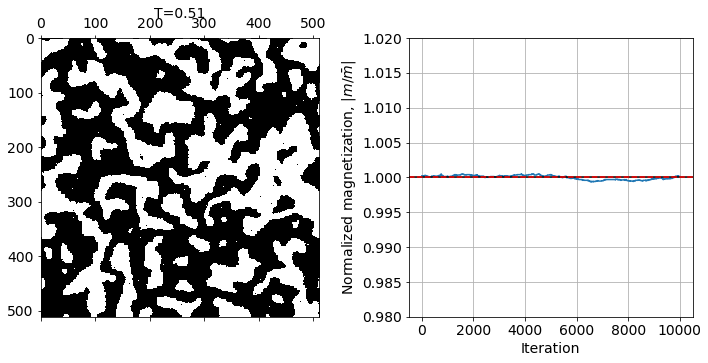

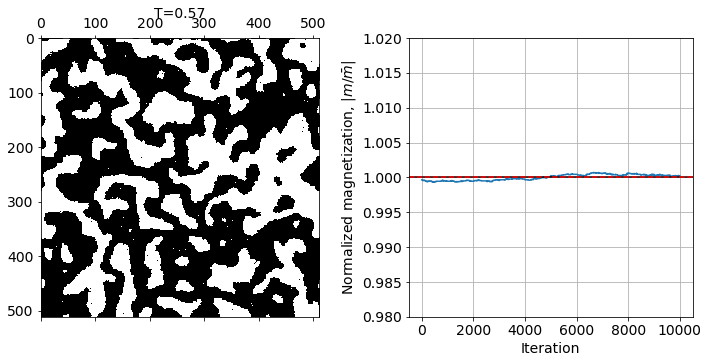

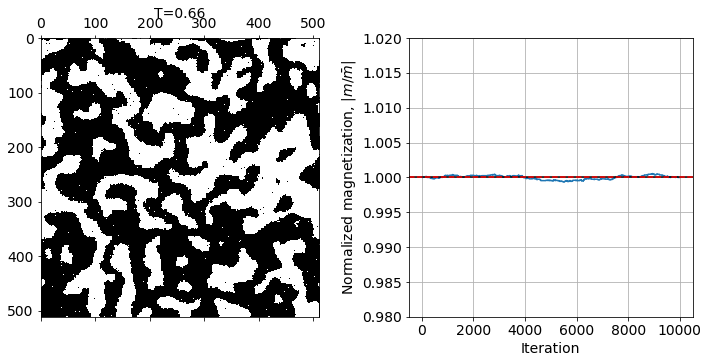

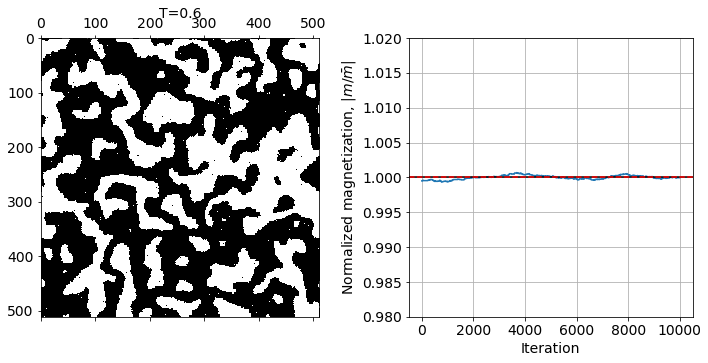

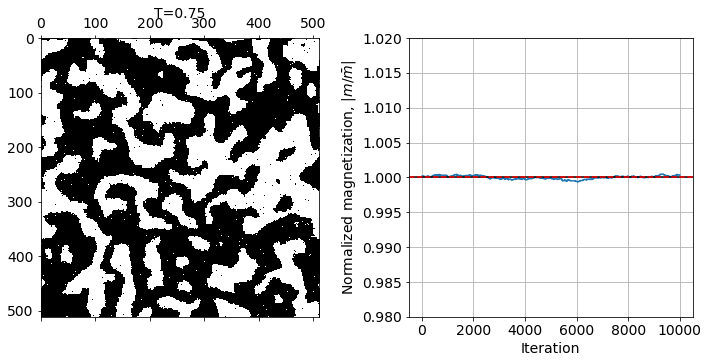

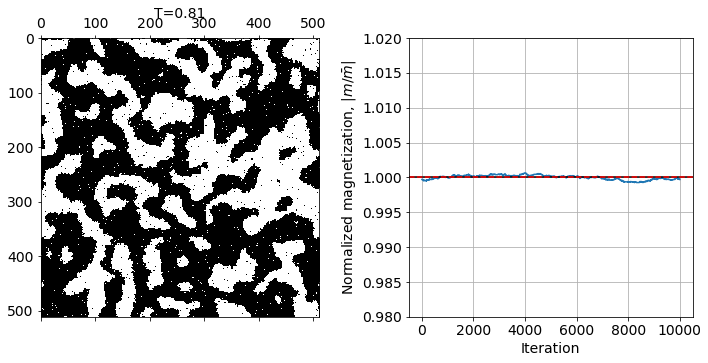

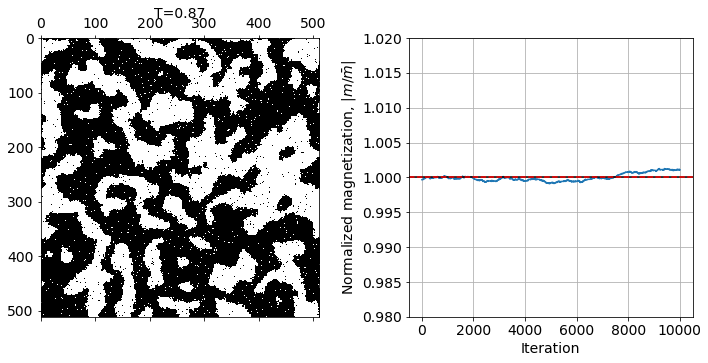

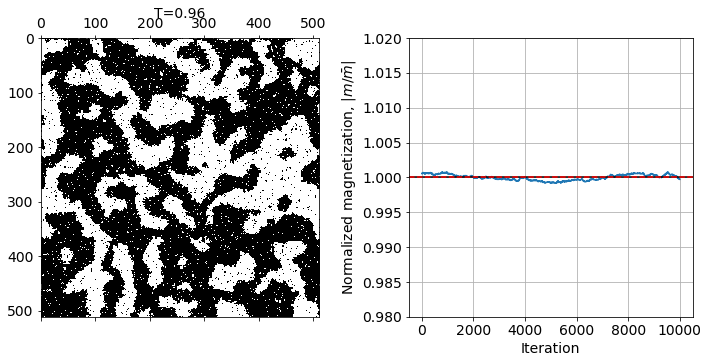

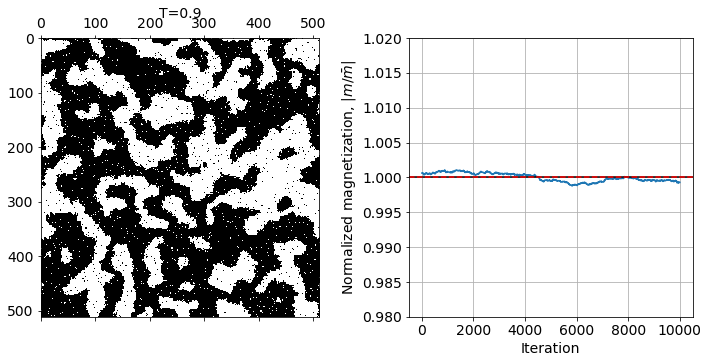

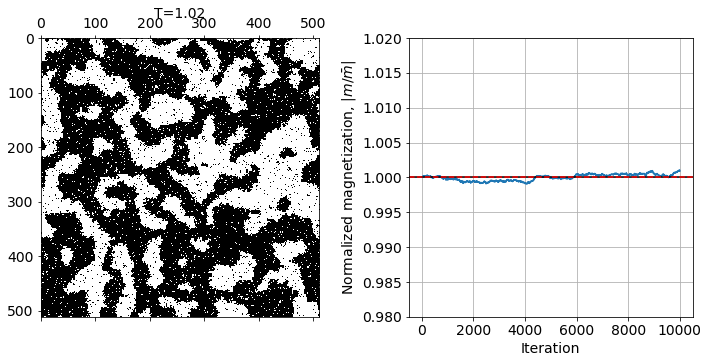

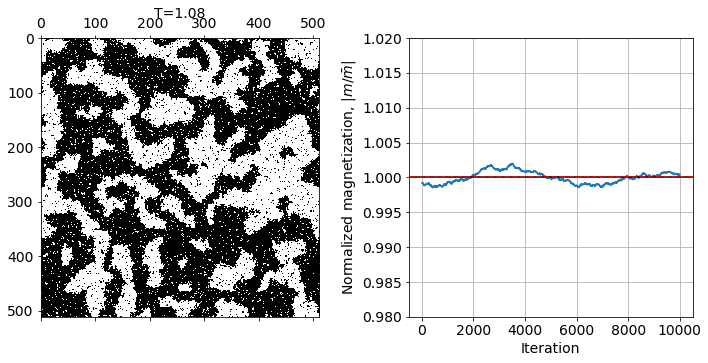

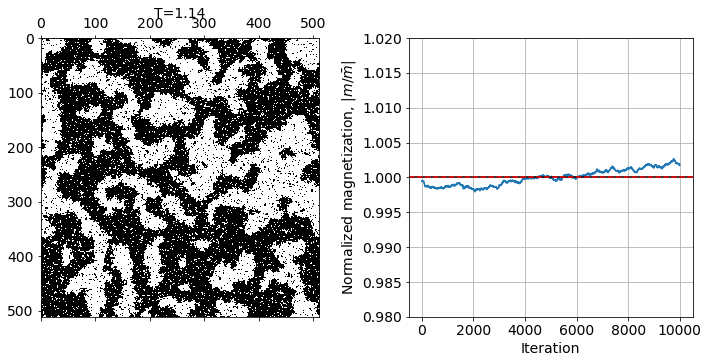

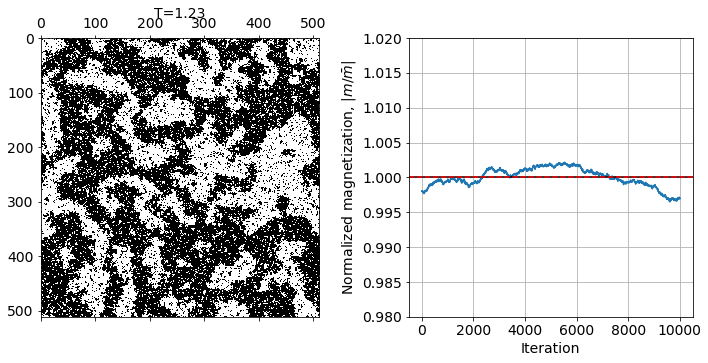

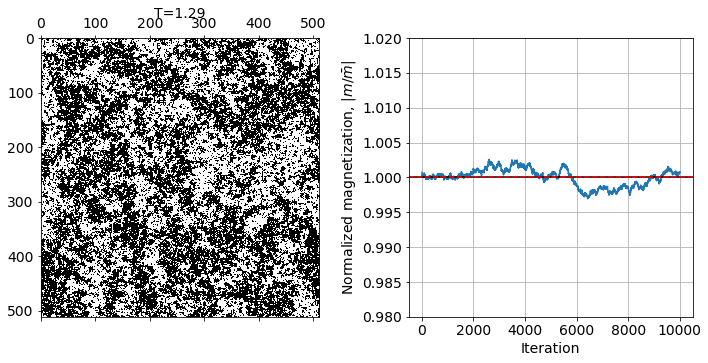

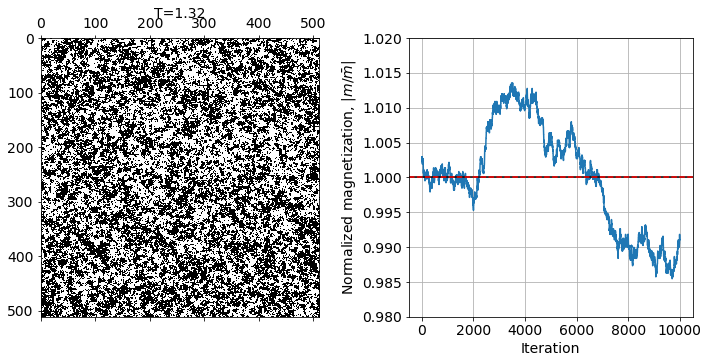

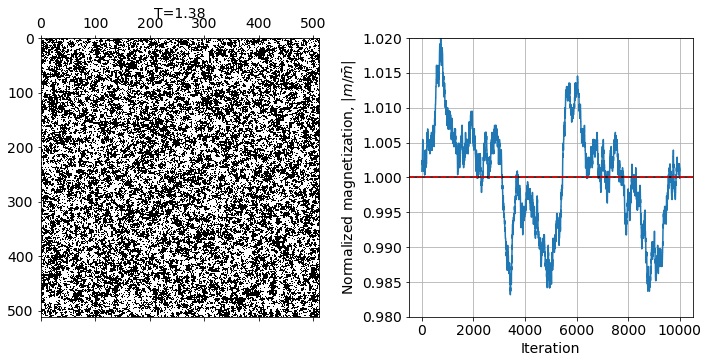

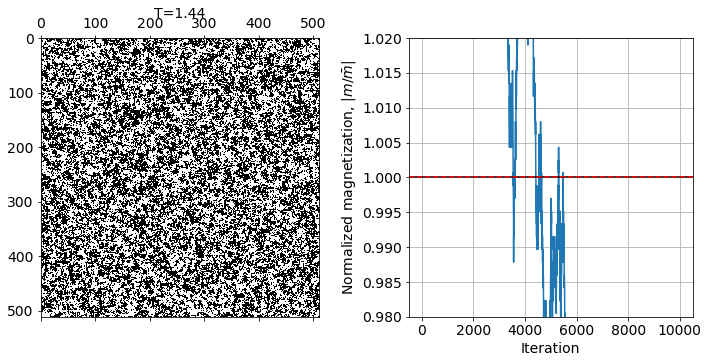

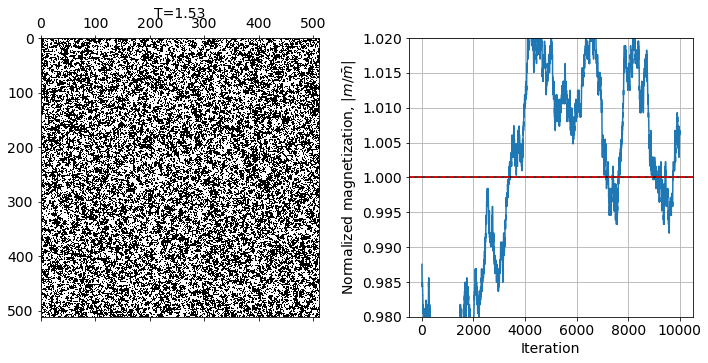

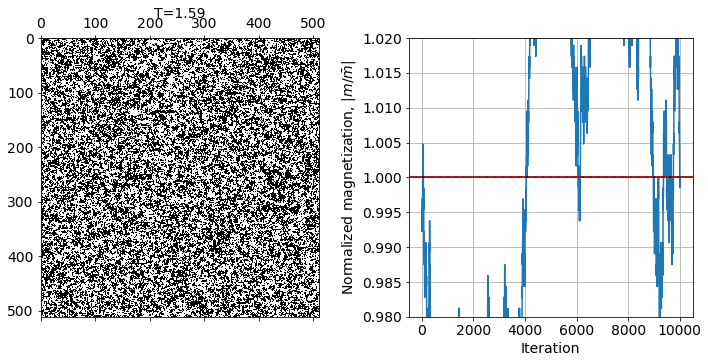

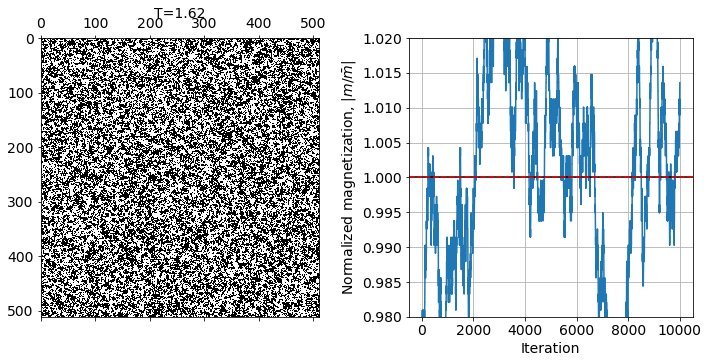

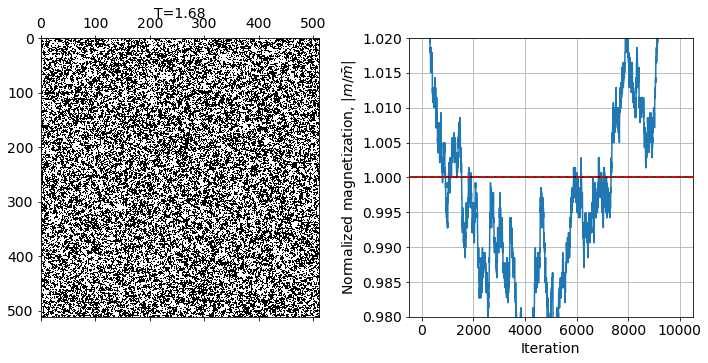

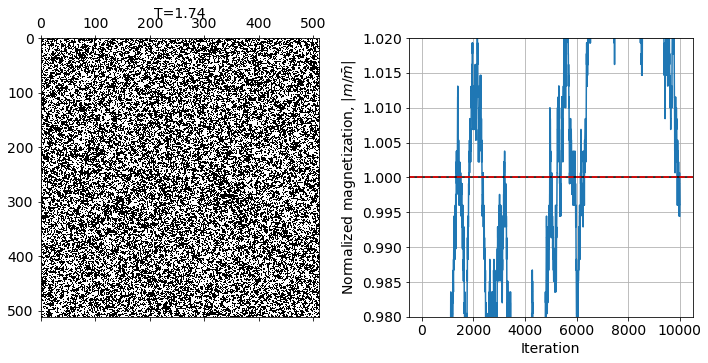

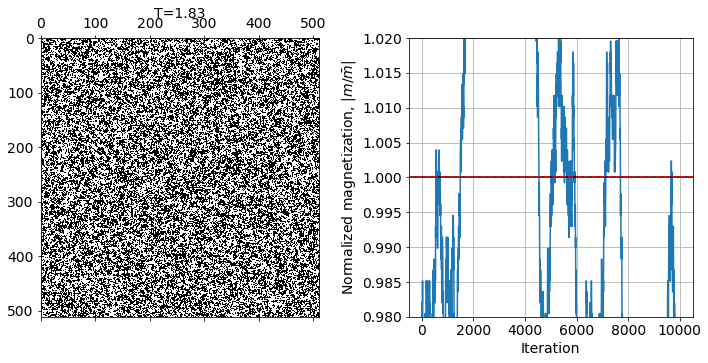

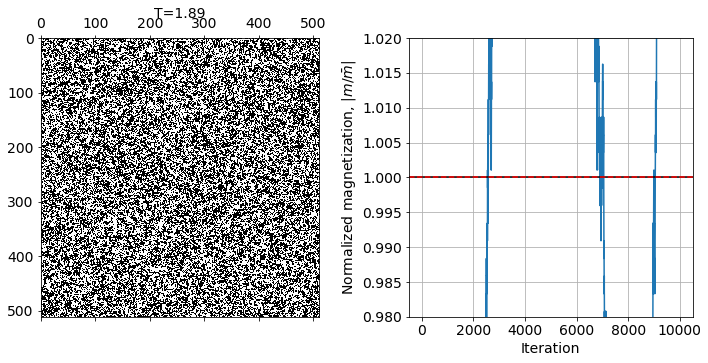

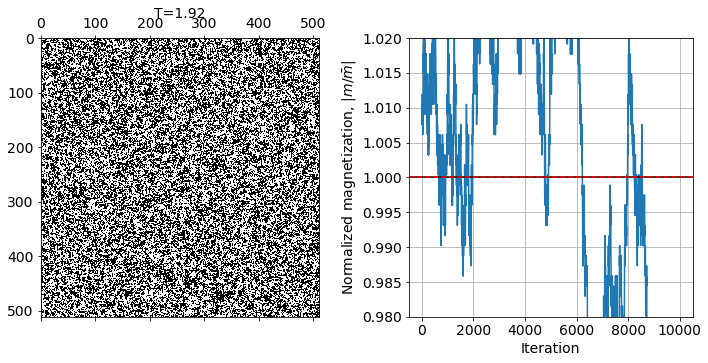

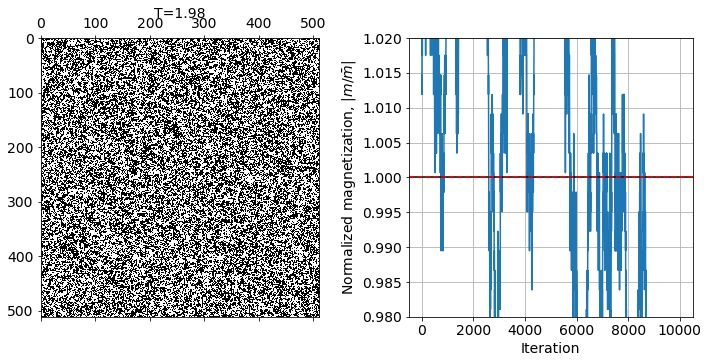

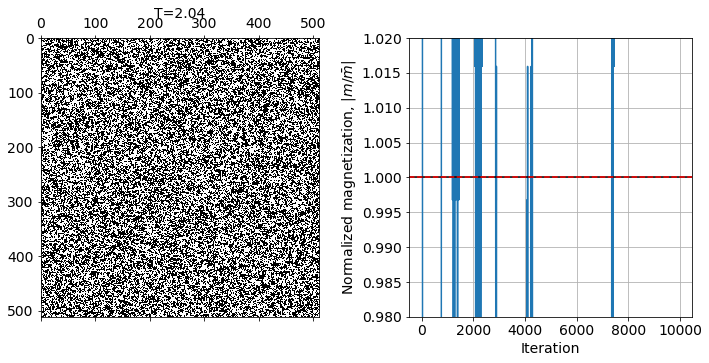

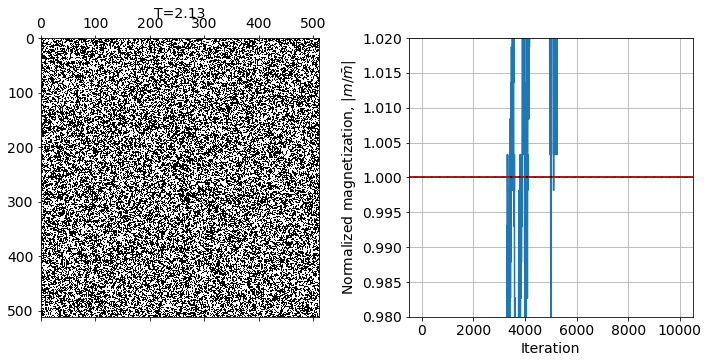

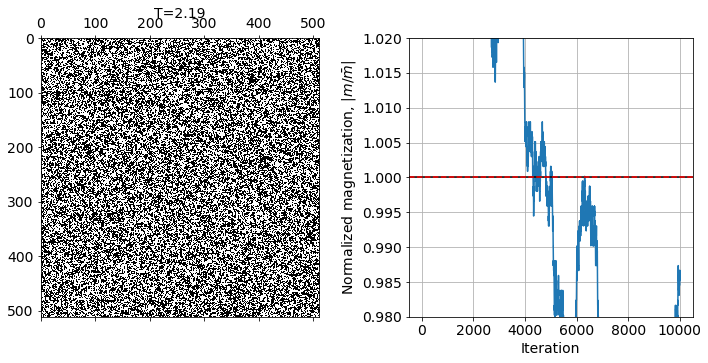

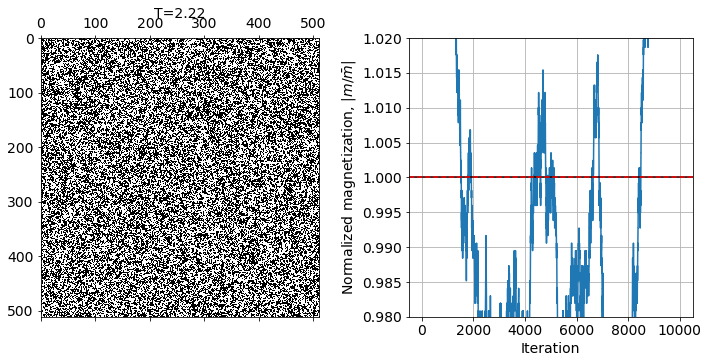

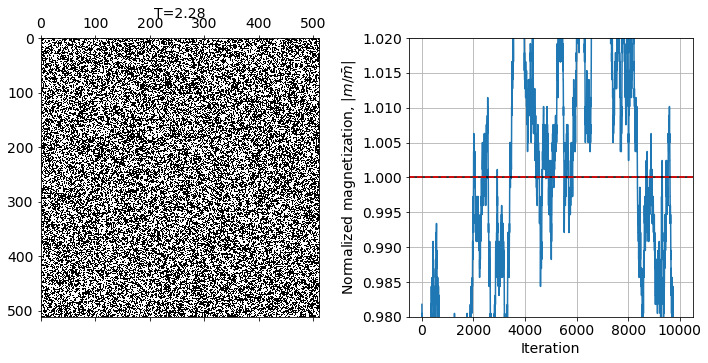

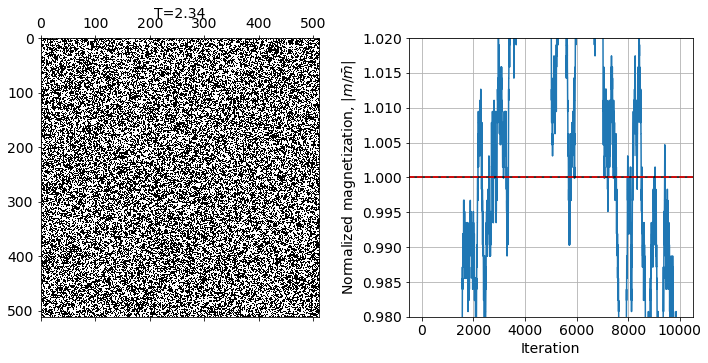

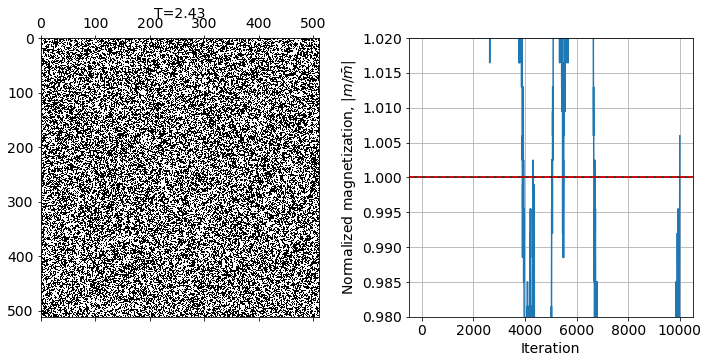

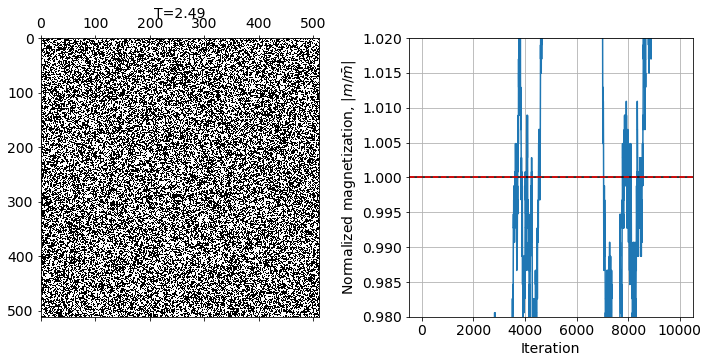

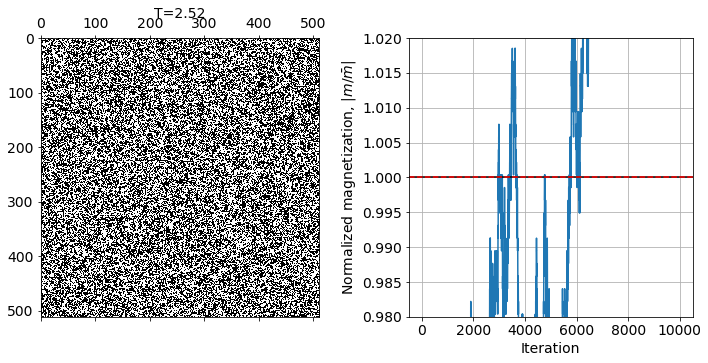

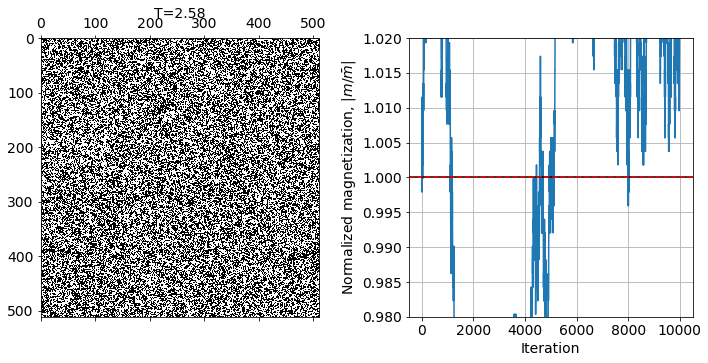

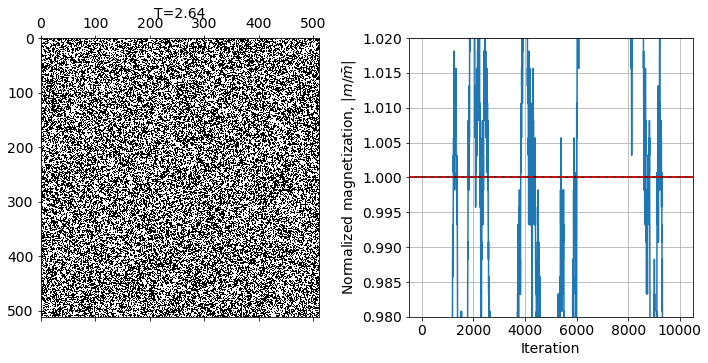

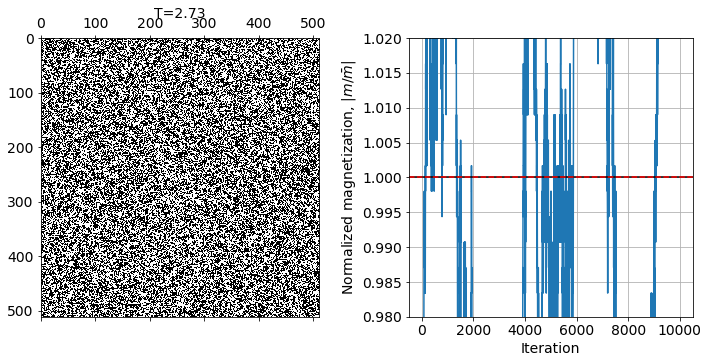

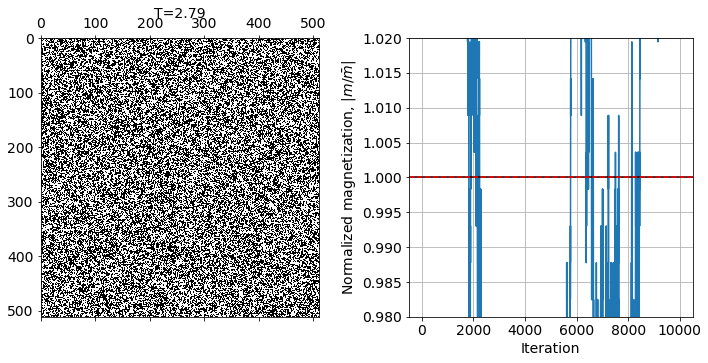

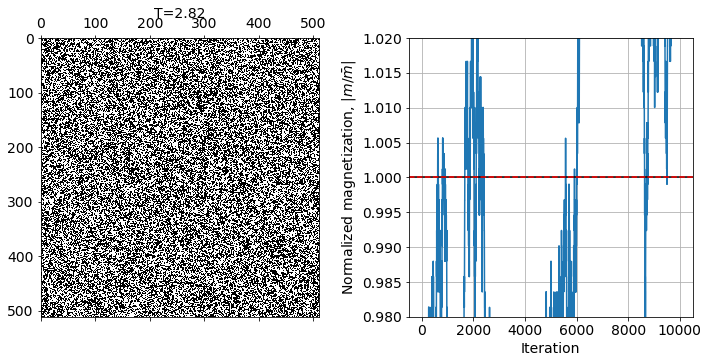

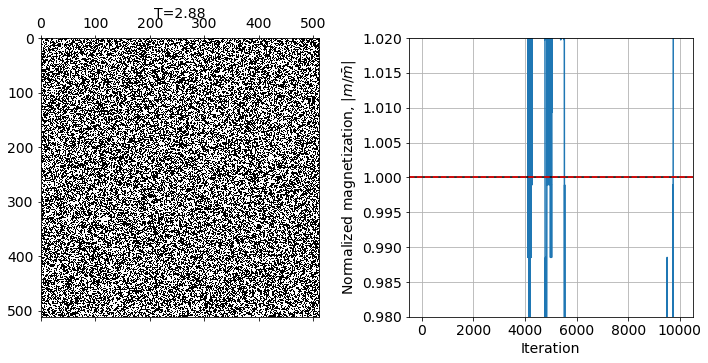

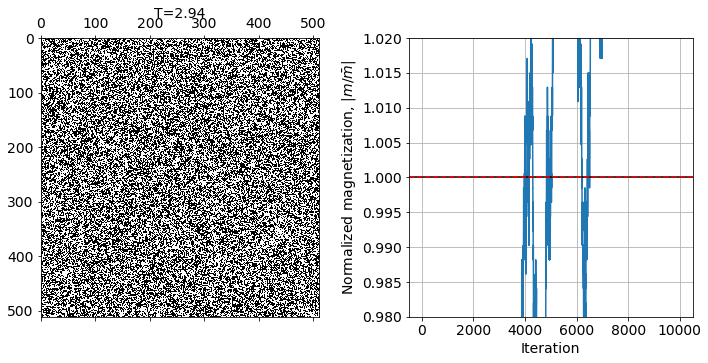

In [34]:
# Plot final lattice
traces = 'problem3_output/N=512/traces/'
path = 'problem3_output/N=512/lattices/'



for idx, filename in enumerate(os.listdir(path)):
    if filename.endswith(".dat") and idx%2==0: 
        data_lat = np.loadtxt(path + filename)
        Temperature = filename.split('_')[0]
        trace_name = Temperature + '_magnetization_trace.dat'
        data_trac = np.loadtxt(traces + trace_name)
        fig, ax = plt.subplots(1,2,figsize=(10,5))
        ax[0].matshow(data_lat, cmap=plt.cm.gray_r)
        ax[0].set_title(Temperature)
        
        ax[1].plot(data_trac[np.where(data_trac != 0)]/np.mean(data_trac))
        ax[1].axhline(1, color='k')
        ax[1].axhline(1+1e-5, color='r', linestyle='--')
        ax[1].set_ylim(0.98, 1.02)
        ax[1].set_xlabel(r'Iteration')
        ax[1].set_ylabel(r'Normalized magnetization, $|m/\bar{m}|$')
        ax[1].grid()
        plt.tight_layout()